# 1.0V

## Script orientado al PRE-PROCESADO de datos

### Acciones realizadas:

1. **Limpieza de Datos**:
    - Identificación y eliminación de valores NaN
    - Interpolación lineal para valores faltantes

2. **Análisis de Tendencias y Patrones Estacionales**:
    - Resampleo diario y mensual

3. **Creación de Nuevas Características**

4. **Correlación de Características**

5. **Análisis de Outliers**

6. **Generación de nuevo csv de datos preprocesados y normalizados**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# DEFINIR NOMBRE DEL ARCHIVO CSV A GENERAR (CAMBIAR NOMBRE SI HYA MODIFICACIONES DE CÓDIGO)
n = '0'

In [7]:
# Cargar los datos proporcionados
data = pd.read_csv('time_series_60min_singleindex.csv', parse_dates=['utc_timestamp'], index_col='utc_timestamp')


In [8]:
# Filtrar las columnas relevantes
columns_of_interest = ['DE_solar_generation_actual', 'DE_wind_generation_actual', 'DE_load_actual_entsoe_transparency']
data = data[columns_of_interest]

In [9]:
# 1. Limpieza de Datos: Identificación y eliminación de valores NaN
nan_counts = data.isna().sum()

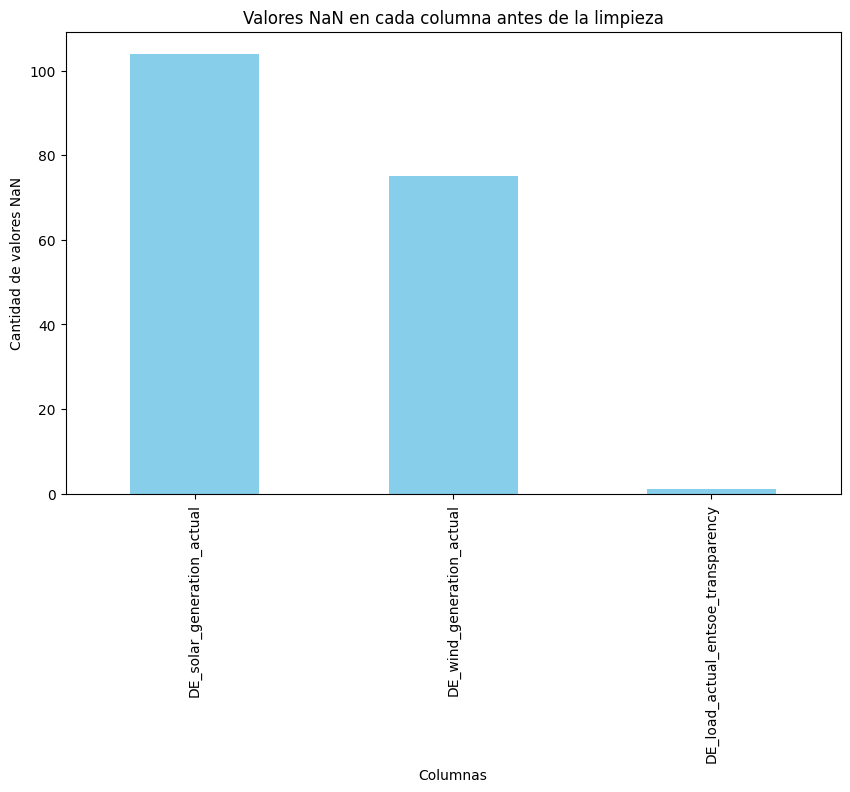

In [10]:
# Gráfico 1: Gráfica de valores NaN antes de la limpieza
plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Valores NaN en cada columna antes de la limpieza')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores NaN')
plt.show()

In [11]:
# Limpieza: Interpolación lineal para valores faltantes
data = data.interpolate(method='linear')

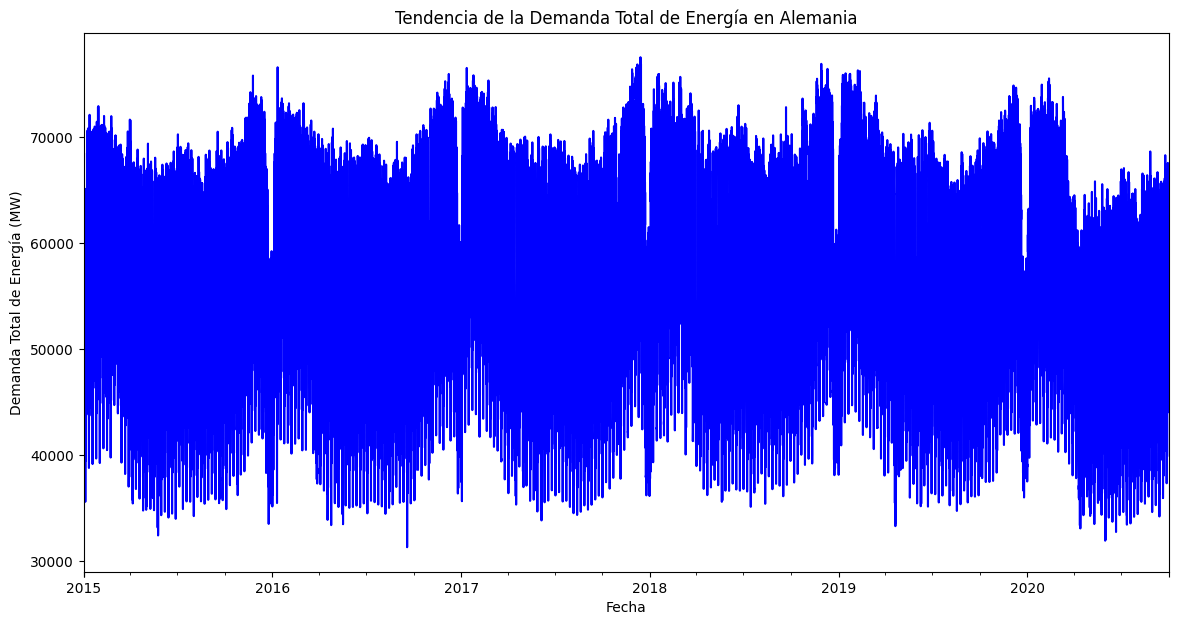

In [12]:
# 2. Análisis de Tendencias y Patrones Estacionales
# Gráfico 2: Tendencia de la demanda total de energía en Alemania
plt.figure(figsize=(14, 7))
data['DE_load_actual_entsoe_transparency'].plot(title='Tendencia de la Demanda Total de Energía en Alemania', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Demanda Total de Energía (MW)')
plt.show()

In [13]:
# Resampleo diario y mensual
daily_data = data['DE_load_actual_entsoe_transparency'].resample('D').mean()
monthly_data = data['DE_load_actual_entsoe_transparency'].resample('M').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_5808\3332360577.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['DE_load_actual_entsoe_transparency'].resample('M').mean()


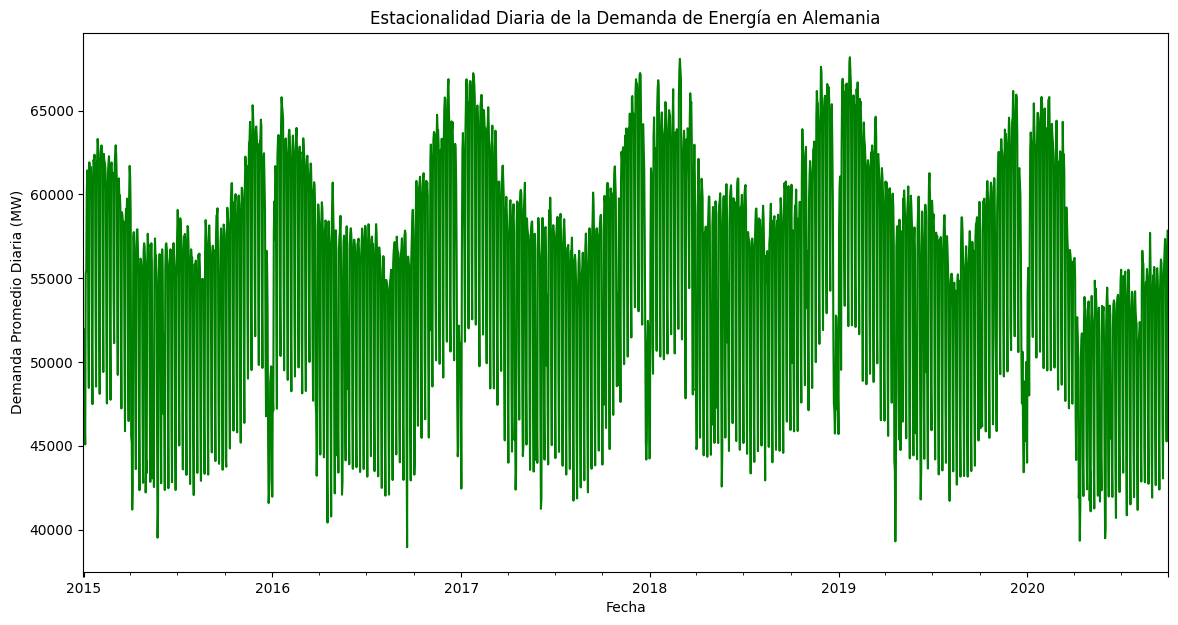

In [14]:
# Gráfico 3: Estacionalidad diaria de la demanda de energía en Alemania
plt.figure(figsize=(14, 7))
daily_data.plot(title='Estacionalidad Diaria de la Demanda de Energía en Alemania', color='green')
plt.xlabel('Fecha')
plt.ylabel('Demanda Promedio Diaria (MW)')
plt.show()

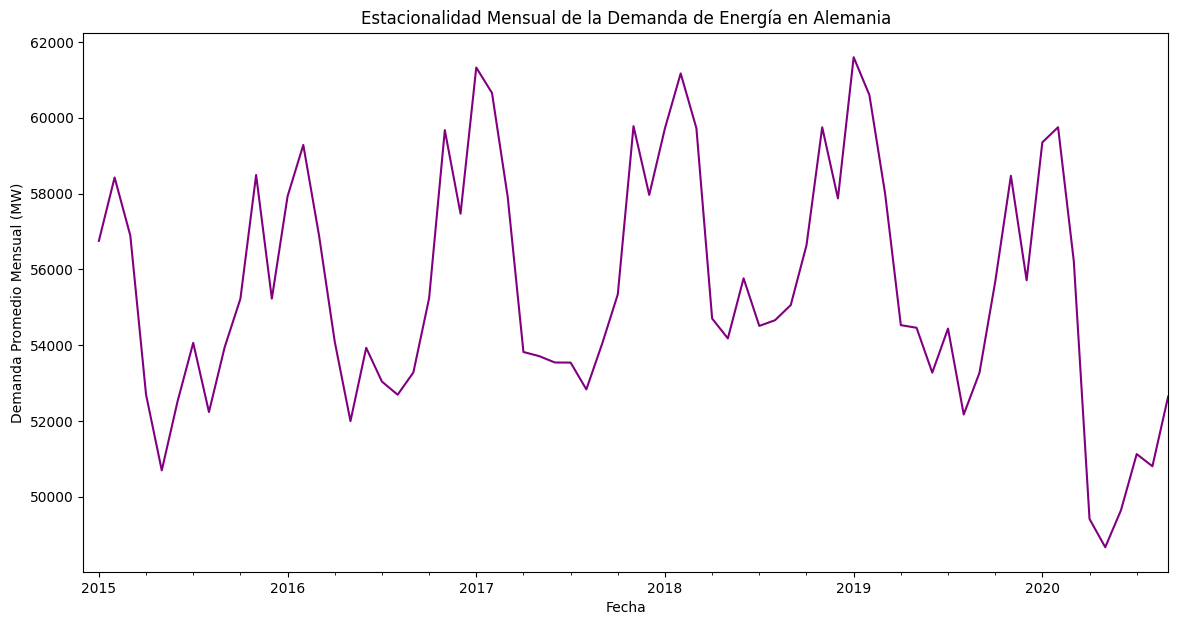

In [15]:
# Gráfico 4: Estacionalidad mensual de la demanda de energía en Alemania
plt.figure(figsize=(14, 7))
monthly_data.plot(title='Estacionalidad Mensual de la Demanda de Energía en Alemania', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Demanda Promedio Mensual (MW)')
plt.show()

In [16]:
# 3. Creación de Nuevas Características
data['month'] = data.index.month

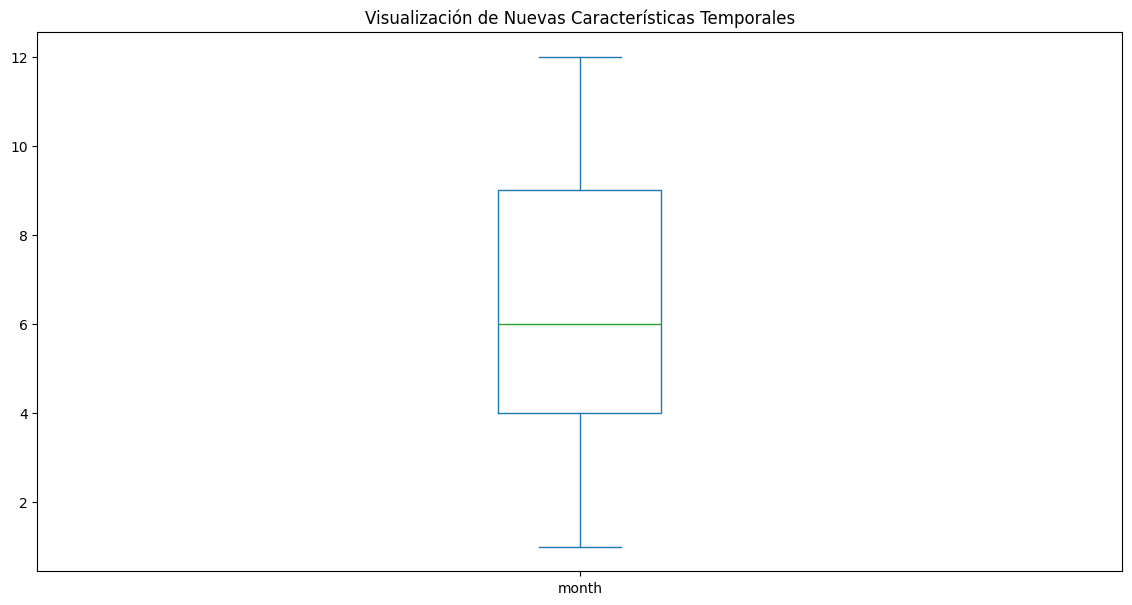

In [17]:
# Gráfico 5: Visualización de las nuevas características temporales creadas
plt.figure(figsize=(14, 7))
data['month'].sample(1000).plot(kind='box', figsize=(14, 7))
plt.title('Visualización de Nuevas Características Temporales')
plt.show()

In [18]:
# 4. Correlación de Características
correlation_matrix = data.corr()

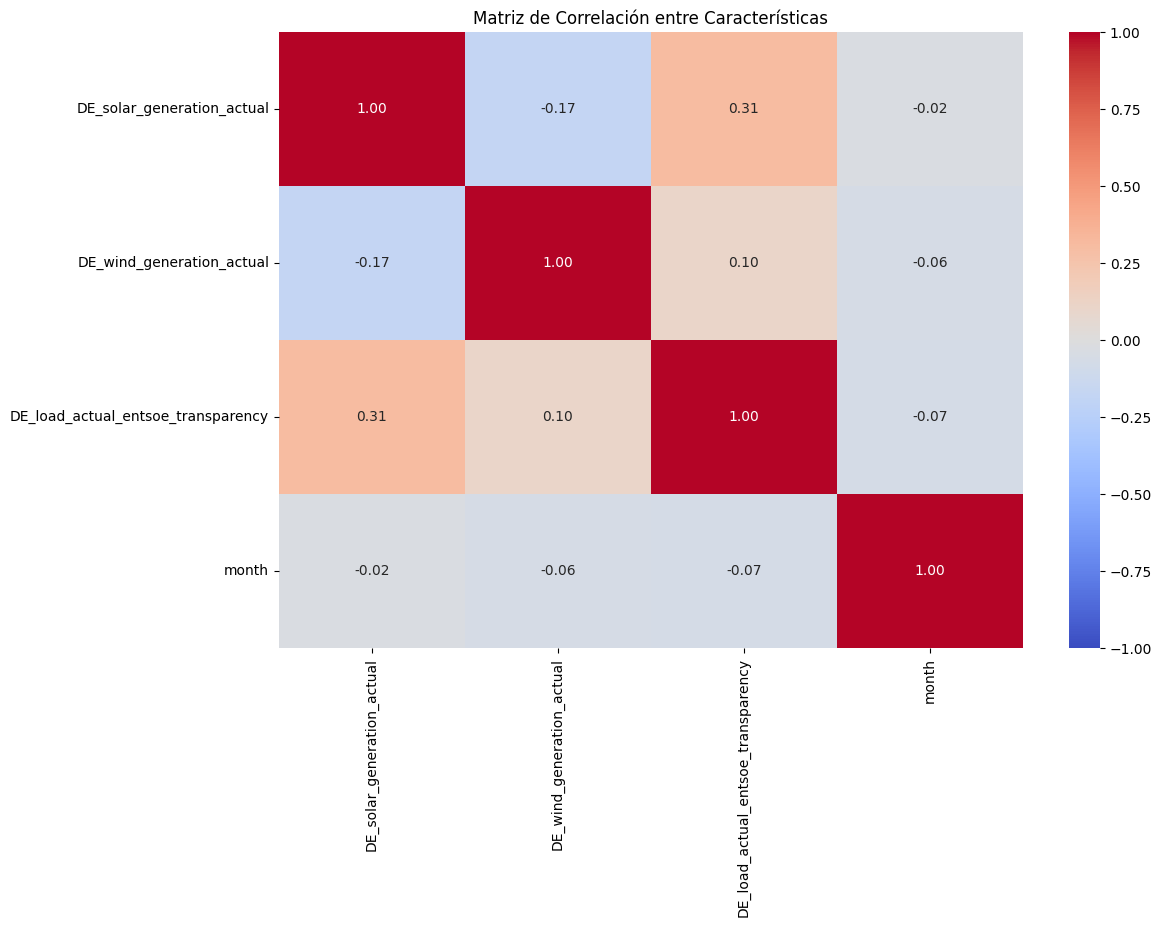

In [19]:
# Gráfico 6: Matriz de Correlación entre las características
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Características')
plt.show()

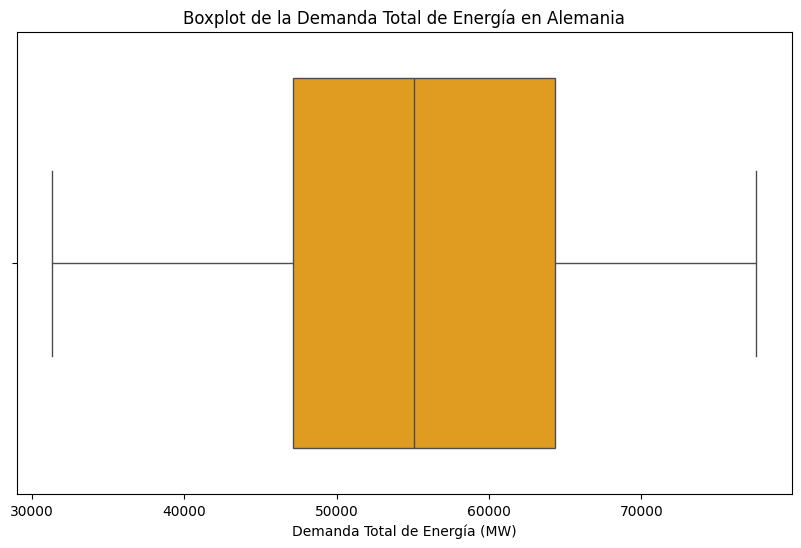

OSError: Cannot save file into a non-existent directory: 'Datasets\Processed_Data'

In [20]:
# 5. Análisis de Outliers
# Gráfico 7: Boxplot de la demanda total de energía en Alemania
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['DE_load_actual_entsoe_transparency'], color='orange')
plt.title('Boxplot de la Demanda Total de Energía en Alemania')
plt.xlabel('Demanda Total de Energía (MW)')
plt.show()

data.to_csv(f'./Datasets/Processed_Data/processed_data_{n}.csv')